In [214]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from IPython.display import display, Latex
from scipy.constants import g

In [215]:
# importing local modules
import sys
sys.path.append('...\\...\\utility')

from utility import plots

In [216]:
# Setting up the plots
plots.set_style()

In [217]:
def process_periods(periods):
    """
    Processes the periods of oscillation
    """
    # Calculating the average period and standard deviation
    period_avg = np.mean(periods)
    period_std = np.std(periods)/np.sqrt(len(periods))
    period = ufloat(period_avg, period_std)
    natural_frequency = 1/period
    natural_angular_frequency = 2*np.pi*natural_frequency
    return period, natural_frequency, natural_angular_frequency

# Part 1: Measuring spring constants
For the three (supposedly identical) spring, we're measuring the displacement using a meter stick while increasing mass from 50g to 130g in steps of 20g (5 measurements).

In [218]:
spring_1_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_1_displacement = np.array([14.0, 19.5, 25.0, 30.5, 36.3])*1E-2 # in m

In [219]:
spring_1_force = spring_1_mass*g # in N

In [220]:
# Plotting the force vs displacement and fit using np.polyfit for spring 1
fit = np.polyfit(spring_1_displacement, spring_1_force, 1)
spring_1_k = fit[0]
display(Latex('Spring 1 spring constant: {:.4f} N/m'.format(spring_1_k)))

<IPython.core.display.Latex object>

In [221]:
# Repeat for spring 2
spring_2_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_2_displacement = np.array([14.5, 20.0, 25.7, 31.5, 37.0])*1E-2 # in m

In [222]:
spring_2_force = spring_2_mass*9.81 # in N

In [223]:
# Plotting the force vs displacement and fit using np.polyfit for spring 2
fit = np.polyfit(spring_2_displacement, spring_2_force, 1)
spring_2_k = fit[0]
display(Latex('Spring 2 spring constant: {:.4f} N/m'.format(spring_2_k)))

<IPython.core.display.Latex object>

In [224]:
# Repeat for spring 3
spring_3_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_3_displacement = np.array([13.0, 18.5, 24.0, 29.5, 35.2])*1E-2 # in m

In [225]:
spring_3_force = spring_3_mass*9.81 # in N

In [226]:
# Plotting the force vs displacement and fit using np.polyfit for spring 3
fit = np.polyfit(spring_3_displacement, spring_3_force, 1)
spring_3_k = fit[0]
display(Latex('Spring 3 spring constant: {:.4f} N/m'.format(spring_3_k)))

<IPython.core.display.Latex object>

In [227]:
# List of spring constants
spring_constants = np.array([spring_1_k, spring_2_k, spring_3_k])
display(Latex('Spring constants: {:.4f} N/m, {:.4f} N/m, {:.4f} N/m'.format(spring_constants[0], spring_constants[1], spring_constants[2])))

<IPython.core.display.Latex object>

3.512720924314399

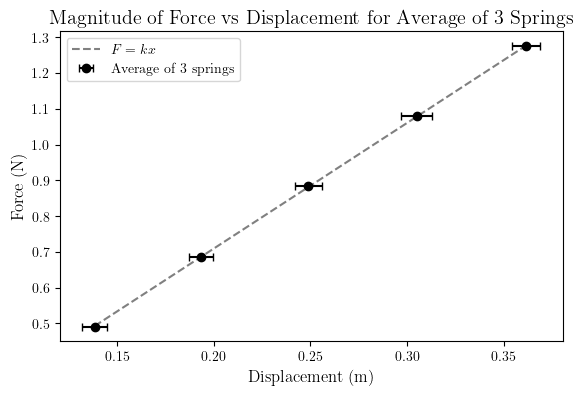

In [228]:
# Plotting average spring constant
fig, ax = plt.subplots(1, 1, figsize=plots.set_size('default', fraction=1))

spring_avg_displacement = np.array([np.mean([spring_1_displacement[i], spring_2_displacement[i], spring_3_displacement[i]]) for i in range(len(spring_1_displacement))])
spring_std_displacement = np.array([np.std([spring_1_displacement[i], spring_2_displacement[i], spring_3_displacement[i]]) for i in range(len(spring_1_displacement))])

fit = np.polyfit(spring_avg_displacement, spring_1_force, 1)
spring_avg_fit_fn = np.poly1d(fit)

ax.errorbar(spring_avg_displacement, spring_1_force, xerr = spring_std_displacement, fmt='o', label='Average of 3 springs', capsize=3, capthick=1, color = "black")
ax.plot(spring_avg_displacement, spring_avg_fit_fn(spring_avg_displacement), label=r'$F = kx$'.format(fit[0]), color = "grey", linestyle = "--")
ax.set_xlabel('Displacement (m)')
ax.set_ylabel('Force (N)')
ax.set_title('Magnitude of Force vs Displacement for Average of 3 Springs')
ax.legend()
# fig.savefig('../figures/spring_avg.pdf', bbox_inches='tight')
fit[0]

In [229]:
# Calculating the average spring constant and standard deviation
spring_constant_avg = np.mean(spring_constants)
spring_constant_std = np.std(spring_constants)/np.sqrt(len(spring_constants))
spring_constant = ufloat(spring_constant_avg, spring_constant_std)
display(Latex('Average spring constant: ${:L}$ N/m'.format(spring_constant)))

<IPython.core.display.Latex object>

# Part 2: The forced, damped, harmonic oscillator
 - Calculate the period of the oscillator with no driving force
  - Calculate the natural frequency of the oscillator $f_0$ and the natural angular frequency $\omega_0$

In [230]:
# Mass of air carts in kg
air_cart_masses = unumpy.uarray([207.9, 206.4], [0.05, 0.05])*1E-3

In [231]:
# Measurements of period of oscillation with no driving force along with calculated natural frequency and angular frequency
periods = np.array([1.11, 0.96, 0.89, 1.11, 1.08, 1.09, 0.98, 1.03, 1.37, 1.14]) # in s
period, natural_frequency, natural_angular_frequency = process_periods(periods)
display(Latex('Average period: ${:L}$ s'.format(period)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Calculating the theoretical natural frequency and angular frequency


In [232]:
# Calculating the theoretical natural frequency and angular frequency for single cart
natural_angular_frequency_theory_single = unumpy.sqrt(2*spring_constant/air_cart_masses[0])
natural_frequency_theory_single = natural_angular_frequency_theory_single/(2*np.pi)
display(Latex('Theoretical natural frequency: ${:L}$ Hz'.format(natural_frequency_theory_single)))
display(Latex('Theoretical natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency_theory_single)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Turning on the driving force
- Set driving frequency to 0.5 Hz from predicted resonance frequency
- Increase by 0.1 Hz until withing 0.05 Hz of resonance frequency, then increase by 0.01 Hz.
- Once the resonance frequency is passed by 0.05 Hz, increase by 0.1 Hz for 4 or 5 measurements.

In [233]:
# Theoretical resonance frequency
resonance_frequency_theory_single = natural_frequency_theory_single
display(Latex('Theoretical resonance frequency: ${:L}$ Hz'.format(resonance_frequency_theory_single)))

<IPython.core.display.Latex object>

In [234]:
# Measured resonance frequency for single air cart
driving_frequency_std = 0.0005 # in Hz
oscillation_amplitude_std = 0.005E-2 # in m
driving_frequency = np.array([0.410, 0.513, 0.607, 0.708, 0.805, 0.874, 0.883, 0.895, 0.911, 0.920, 0.924, 0.937, 0.949, 0.992, 1.016, 1.118, 1.216, 1.333]) # in Hz
oscillation_amplitude = np.array([0.3, 0.35, 0.45, 0.5, 0.9, 3.5, 4.5, 11.0, 11.5, 11.5, 5.5, 2.5, 1.5, 0.9, 0.6, 0.4, 0.3, 0.2])*1E-2 # in m

driving_frequency_single = unumpy.uarray(driving_frequency, np.full(len(driving_frequency), driving_frequency_std, dtype = float))
oscillation_amplitude_single = unumpy.uarray(oscillation_amplitude, np.full(len(oscillation_amplitude), oscillation_amplitude_std, dtype = float))

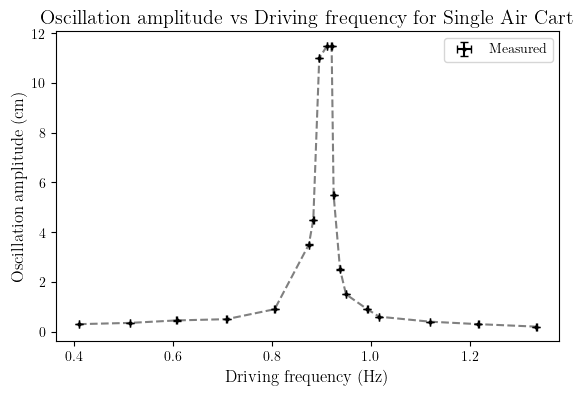

In [235]:
# Plotting the amplitude of oscillation vs driving frequency
fig, ax = plt.subplots(1, 1, figsize=plots.set_size('default', fraction=1))
ax.plot(unumpy.nominal_values(driving_frequency_single), unumpy.nominal_values(oscillation_amplitude_single)*1E2, color = "grey", linestyle = "--")
ax.errorbar(unumpy.nominal_values(driving_frequency_single), unumpy.nominal_values(oscillation_amplitude_single)*1E2,
            xerr = unumpy.std_devs(driving_frequency_single), yerr = unumpy.std_devs(oscillation_amplitude_single)*1E2, fmt='o',label='Measured', capsize=3, capthick=1, color = "black", ms = 2)
ax.set_xlabel('Driving frequency (Hz)')
ax.set_ylabel('Oscillation amplitude (cm)')
ax.set_title('Oscillation amplitude vs Driving frequency for Single Air Cart')
ax.legend()
fig.savefig('../figures/oscillation_amplitude_vs_driving_frequency_single.pdf', bbox_inches='tight')

# Adding weight to the single air cart, drived system

In [236]:
# measuring period of oscillation with no driving force
periods = np.array([1.08, 1.16, 1.18, 1.18, 1.06, 1.13, 1.10, 1.13, 1.18, 1.13]) # in s
period, natural_frequency, natural_angular_frequency = process_periods(periods)
display(Latex('Average period: ${:L}$ s'.format(period)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [237]:
# Theoretical resonance frequency for single air cart with weight of 20 g
added_mass = 20E-3 # in kg
natural_angular_frequency_theory_single_weight = unumpy.sqrt(2*spring_constant/(air_cart_masses[0] + added_mass))
natural_frequency_theory_single_weight = natural_angular_frequency_theory_single_weight/(2*np.pi)
display(Latex('Theoretical natural frequency: ${:L}$ Hz'.format(natural_frequency_theory_single_weight)))
display(Latex('Theoretical natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency_theory_single_weight)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [238]:
# Measured resonance frequency for single air cart with weight of 50 g  (NOT FINISHED, REDO EVENTUALLY)
driving_frequency= np.array([0.187, 0.269, 0.380, 0.486, 0.593, 0.696, 0.770, 0.795, 0.809, 0.820, 0.840, 0.855, 0.869, 0.885, 0.908, 0.924, 0.955, 0.973, 1.053, 1.205, 1.304]) # in Hz
oscillation_amplitude = np.array([2.4, 1.2, 0.8, 0.8, 0.9, 1.2, 2.2, 2.3, 1.8, 2.1, 4.1, 5.2, 39.5-24.6, 38.2 - 26.0, 35.5 - 27.8, 34.2- 30, 33.7-30.5, 2.2, 1.4, 0.8, 0.7])*1E-2 # in m

driving_frequency_single_weight = unumpy.uarray(driving_frequency, np.full(len(driving_frequency), driving_frequency_std, dtype = float))
oscillation_amplitude_single_weight = unumpy.uarray(oscillation_amplitude, np.full(len(oscillation_amplitude), oscillation_amplitude_std, dtype = float))

# Two Air Tracks


In [239]:
# measuring periods
periods1 = np.array([1.58, 1.56, 1.58, 1.55, 1.50, 1.45, 1.46, 1.58, 1.40, 1.53])
period1, natural_frequency1, natural_angular_frequency1 = process_periods(periods)
display(Latex('Average period: ${:L}$ s'.format(period)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [240]:
periods2 = np.array([0.98, 0.83, 0.90, 0.86, 0.86, 0.85, 0.85, 0.83, 0.94, 0.95])
period2, natural_frequency2, natural_angular_frequency2 = process_periods(periods2)
display(Latex('Average period: ${:L}$ s'.format(period2)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency2)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency2)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [241]:
# Calculating the theoretical natural frequency and angular frequency for two carts
natural_angular_frequency_theory_two = (unumpy.sqrt(2*spring_constant/(air_cart_masses[0])))
natural_frequency_theory_two = natural_angular_frequency_theory_two/(2*np.pi)
display(Latex('Theoretical natural frequency: ${:L}$ Hz'.format(natural_frequency_theory_two)))

<IPython.core.display.Latex object>

In [242]:
# Theoretical resonance frequency for two air carts
resonance_frequency_theory_two = (natural_frequency_theory_two*unumpy.sqrt(1/2), natural_frequency_theory_two*unumpy.sqrt(3/2))
display(Latex('Theoretical resonance frequency 1: ${:L}$ Hz'.format(resonance_frequency_theory_two[0])))
display(Latex('Theoretical resonance frequency 2: ${:L}$ Hz'.format(resonance_frequency_theory_two[1])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [243]:
# measuring resonance frequencies
driving_frequency = np.array([0.186, 0.289, 0.388, 0.490, 0.584, 0.620, 0.636, 0.649, 0.658, 0.688, 0.708, 0.761, 0.815, 0.928, 0.997, 1.055, 1.130, 1.217, 1.322, 1.401, 1.499, 1.602, 2.026, 2.512]) # in Hz
oscillation_amplitude = np.array([0.4, 0.8, 0.4, 0.4, 2.2, 4.0, 5.5, 37.5-19.5, 36.5-20.0, 31.5-26, 2, 1.6, 1, 0.6, 1.5, 3.5, 4.2, 6, 3.5, 3, 2.2, 1.3, 0.7, 0.3, 0.2])*1E-2 # in m

driving_frequency_double = unumpy.uarray(driving_frequency, np.full(len(driving_frequency), driving_frequency_std, dtype = float))
oscillation_amplitude_double = unumpy.uarray(oscillation_amplitude, np.full(len(oscillation_amplitude), oscillation_amplitude_std, dtype = float))